In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline

In [65]:
presc = pd.read_csv('data_prep/opioids_V2.csv.gz', compression='gzip')
wards = pd.read_csv('data_prep/Wards.csv')

In [66]:
presc.head(n=3)

,YYYYMM,LSOA_CODE,Total_prescriptions,OME,Patient_count
0,201501,E01012190,8901.145937,68664.764076,1414.0
1,201501,E01012191,10174.908430,79068.447820,1618.0
2,201501,E01012192,10696.648341,86855.925536,1511.0


(1.3862943611198906, 9.876886870738948, 7.456454555176209, 7.489189594008885, 0.2474464776419101)


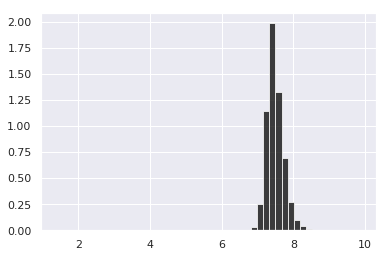

In [67]:
# the histogram of the data
data = np.log(presc['Patient_count'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

(7.292310821806346, 3649715.3070342783, 42018.25351359529, 52233.19715227151, 54609.87849370915)


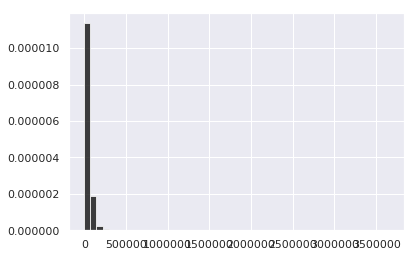

In [69]:
# the histogram of the data
data = (presc['OME'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

(1.0457689178193652, 60728.915196631955, 4440.2220065630045, 4947.153536153132, 3047.677379222613)


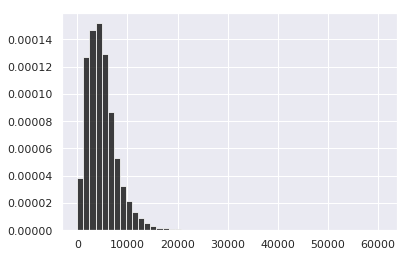

In [70]:
# the histogram of the data
data = (presc['Total_prescriptions'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

In [71]:
wards.head(n=3)

,Unnamed: 0,LSOA11CD,WD15CD,WD15NM,LAD15CD,LocalAuthorityName,CityName
0,0,E01000104,E05000041,Village,E09000002,Barking and Dagenham,London
1,1,E01000105,E05000041,Village,E09000002,Barking and Dagenham,London
2,2,E01000106,E05000041,Village,E09000002,Barking and Dagenham,London


In [72]:
london_LSOAs = wards[wards['CityName'] == 'London']

In [73]:
London_preac = presc[presc['LSOA_CODE'].isin(london_LSOAs['LSOA11CD'])]

In [74]:
London_preac.sort_values(by=['YYYYMM'],inplace=True)

/10TBdrive/sagarj/anaconda3/envs/env_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
area_dict = {'YYYYMM':[], 'mean_count':[] , 'mean_dosage' : []}
for name , group in London_preac.groupby('YYYYMM'):
    area_dict['YYYYMM'].append(name)
    area_dict['mean_count'].append((np.sum(group['Total_prescriptions'])/np.sum(group['Patient_count'])))
    area_dict['mean_dosage'].append((np.sum(group['OME'])/np.sum(group['Patient_count'])))
area_df = pd.DataFrame.from_dict(area_dict)
area_df.sort_values(by=['YYYYMM'],inplace=True)

([<matplotlib.axis.XTick at 0x7f35d1465e10>,
 <a list of 74 Text xticklabel objects>)

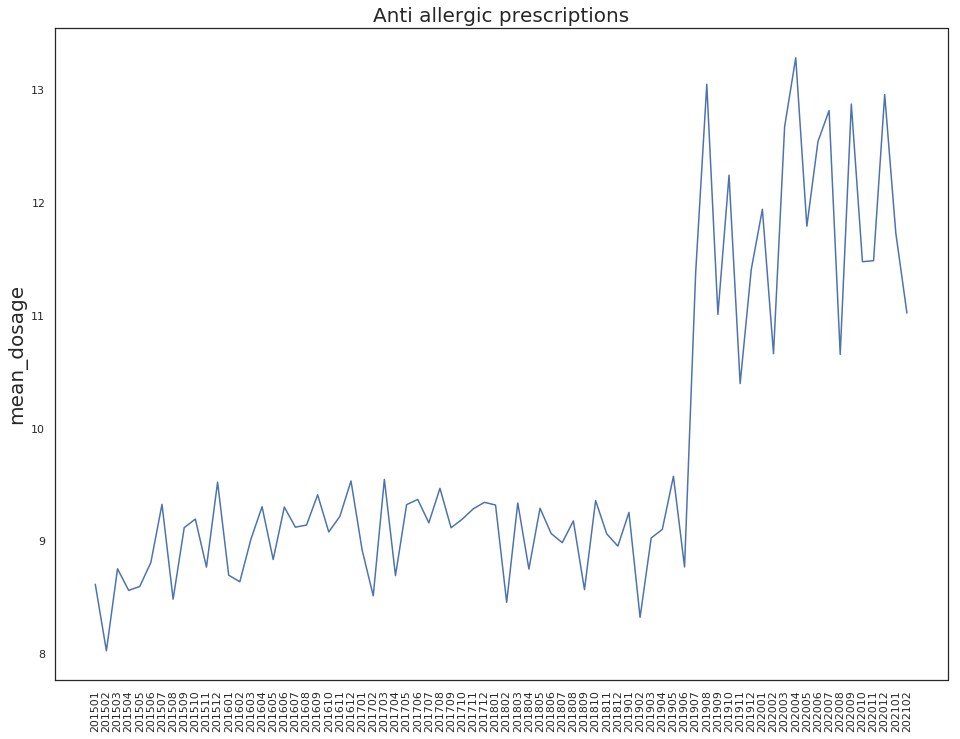

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.set_style("white")
plt.title("Anti allergic prescriptions",fontsize=20)
plt.ylabel("Prescriptions per capita",fontsize=20)
# sns.lineplot(y=area_df['mean_count'],x=np.arange(0,len(area_df),1))
sns.lineplot(y=area_df['mean_dosage'],x=np.arange(0,len(area_df),1))
plt.xticks(np.arange(0,len(area_df),1),area_df['YYYYMM'],rotation=90)